In [1]:
%autosave 11

Autosaving every 11 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# XGBoost
version_numbers = [11, 20, 21, 22, 24]
Runtime = [22.1, 26.8, 33.1, 63.3, 31.8]
PRIVATE_scores = [0.796, 0.793, 0.773, 0.784, 0.782]
public_scores = [0.805, 0.807, 0.786, 0.788, 0.798]

versions = [
    {
        'n_estimators'    : 80,
        'learning_rate'   : 0.1073,
        'max_depth'       : 5, 
        'subsample'       : 0.5411,
        'colsample_bytree': 0.5792,
        'gamma'           : 0.0005
    },
    {
        "n_estimators"    : 417,
        "learning_rate"   : 0.005060571016010517,
        "max_depth"       : 9,
        "subsample"       : 0.8368633456010389,
        "colsample_bytree": 0.759602448382082,
        "gamma"           : 0.04182791414542354
    },
    {
        "n_estimators"    : 50,
        "learning_rate"   : 0.001,
        "max_depth"       : 3,
        "subsample"       : 0.77,
        "colsample_bytree": 0.75,
        "gamma"           : 0.01
    },
    {
        "n_estimators"    : 2500,
        "learning_rate"   : 0.01,
        "max_depth"       : 12,
        "subsample"       : 0.5,
        "colsample_bytree": 0.8,
        "gamma"           : 0.1
    },
    {
        "n_estimators"    : 1000,
        "learning_rate"   : 0.5,
        "max_depth"       : 6,
        "subsample"       : 0.3,
        "colsample_bytree": 0.2,
        "gamma"           : 0.5
    }
]

In [4]:
labels = list(versions[0].keys())

# Generate Final_Score by multiplying each element of the first array by 0.52 and each element of the second array by 0.48
final_Score = [round((x * 0.52) + (y * 0.48),3) for x, y in zip(public_scores, PRIVATE_scores)]
final_Score 

[0.801, 0.8, 0.78, 0.786, 0.79]

In [5]:
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(versions)
#df = df[["depth_CATB","learning_rate_CATB","iterations_CATB","metric_LGBM","is_unbalance_LGBM"]]
df

,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,gamma
0,80,0.107300,5,0.541100,0.579200,0.000500
1,417,0.005061,9,0.836863,0.759602,0.041828
2,50,0.001000,3,0.770000,0.750000,0.010000
3,2500,0.010000,12,0.500000,0.800000,0.100000
4,1000,0.500000,6,0.300000,0.200000,0.500000


In [6]:
# Scaling or mapping functions
def scale_column(column):
    if column.dtype == 'bool':
        return column.astype(int), {True: 1, False: 0}
    elif column.dtype == 'object':
        categories = column.unique()
        mapping = {category: i / (len(categories)-1) for i, category in enumerate(categories)}
        return column.map(mapping), mapping
    else:
        return (column - column.min()) / (column.max() - column.min()), (column.min(), column.max())

# Apply scaling or mapping to each column and store scaling factors or mappings
column_mappings = {}
new_df = pd.DataFrame()
for col in df.columns:
    new_df[col], column_mappings[col] = scale_column(df[col])

print("Mapping or Scaling Factors:")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors:
n_estimators: (50, 2500)
learning_rate: (0.001, 0.5)
max_depth: (3, 12)
subsample: (0.3, 0.8368633456010389)
colsample_bytree: (0.2, 0.8)
gamma: (0.0005, 0.5)


,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,gamma
0,0.012245,0.213026,0.222222,0.449090,0.632000,0.000000
1,0.149796,0.008137,0.666667,1.000000,0.932671,0.082739
2,0.000000,0.000000,0.000000,0.875456,0.916667,0.019019
3,1.000000,0.018036,1.000000,0.372534,1.000000,0.199199
4,0.387755,1.000000,0.333333,0.000000,0.000000,1.000000


In [7]:
# Round the values in new_df to 3 decimal places
new_df = new_df.round(3)

# Round the values in column_mappings to 3 decimal places if they are numeric
for col, mapping in column_mappings.items():
    if isinstance(mapping, dict):
        column_mappings[col] = {k: round(v, 3) for k, v in mapping.items()}
    elif isinstance(mapping, tuple):
        column_mappings[col] = tuple(round(val, 3) for val in mapping)

# Print the updated mappings
print("Mapping or Scaling Factors (After Rounding):")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors (After Rounding):
n_estimators: (50, 2500)
learning_rate: (0.001, 0.5)
max_depth: (3, 12)
subsample: (0.3, 0.837)
colsample_bytree: (0.2, 0.8)
gamma: (0.001, 0.5)


,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,gamma
0,0.012,0.213,0.222,0.449,0.632,0.000
1,0.150,0.008,0.667,1.000,0.933,0.083
2,0.000,0.000,0.000,0.875,0.917,0.019
3,1.000,0.018,1.000,0.373,1.000,0.199
4,0.388,1.000,0.333,0.000,0.000,1.000


In [8]:
new_df["Score"] = pd.Series(final_Score)
new_df

,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,gamma,Score
0,0.012,0.213,0.222,0.449,0.632,0.000,0.801
1,0.150,0.008,0.667,1.000,0.933,0.083,0.800
2,0.000,0.000,0.000,0.875,0.917,0.019,0.780
3,1.000,0.018,1.000,0.373,1.000,0.199,0.786
4,0.388,1.000,0.333,0.000,0.000,1.000,0.790


In [9]:
# Sort the DataFrame by scores in ascending order
new_df_sorted = new_df.sort_values(by='Score', ascending=True)
new_df_sorted

,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,gamma,Score
2,0.000,0.000,0.000,0.875,0.917,0.019,0.780
3,1.000,0.018,1.000,0.373,1.000,0.199,0.786
4,0.388,1.000,0.333,0.000,0.000,1.000,0.790
1,0.150,0.008,0.667,1.000,0.933,0.083,0.800
0,0.012,0.213,0.222,0.449,0.632,0.000,0.801


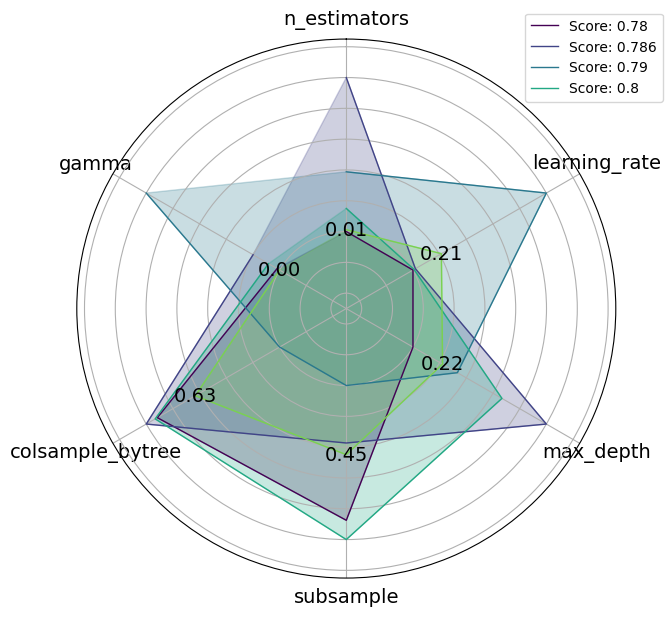

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
labels = new_df.columns[:-1]  # Exclude the 'Score' column
best_score_row = new_df_sorted.iloc[-1]
best_score = best_score_row['Score']
versions = new_df_sorted.drop(columns='Score').to_dict(orient='records')
scores = new_df_sorted['Score']

# Plot radar graph
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(17, 7), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

legend_handles = []  # List to store legend handles
legend_labels = []   # List to store legend labels

for i, (version, score) in enumerate(zip(versions, scores)):
    values = [version[key] for key in labels]
    color = plt.cm.viridis(i / len(scores))  # Adjust the color based on the position
    
    if version == best_score_row.drop('Score').to_dict():
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Score: {best_score}", color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        
        # Add radar values as text labels for the best radar graph
        for angle, value in zip(angles, values):
            ax.text(angle, value, f'{value:.2f}', color='black', fontsize=14, ha='center', va='center')
    else:
        line, = ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        legend_handles.append(line)
        legend_labels.append(f"Score: {score}")

ax.set_yticklabels([])

# Set custom positions for the x-axis tick marks
custom_positions = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
# custom_positions[10] -= 0.066  # Shift the tick mark positions
# custom_positions[11] += 0.066  # Shift the tick mark positions
ax.set_xticks(custom_positions)
ax.set_xticklabels(labels, fontsize=14)

# Set axis limits to slightly lower and higher values
ax.set_ylim(-0.5, 1.25)

# Add legend with all scores
ax.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1.06))

plt.show()


# Chat GPT links:

1) https://chat.openai.com/share/c73821db-2d09-4851-9e95-65c09101fef2

2) https://chat.openai.com/share/f3520156-c785-4193-9e90-c27fadf80c57

3) https://chat.openai.com/share/6f137401-1edf-4774-8f49-d62df8591125